# Teoría
- Qué es el modelo Sequential?  
Es un modelo que permite construir redes neuronales agregando capas en secuencia.
- Qué es un modelo de compilación?  
método para configurar el proceso de aprendizaje, se puede agregar una función de coste, un optimizador y las métricas de rendimiento.
- La capa Dense es básicamente una capa de regresión lineal.
- Qué es shape?  
Es la forma de los datos de entrada que el modelo debe esperar, sólo se define en la capa de entrada.
- Sample:  
Un elemento de un conjunto de datos.
- Batch:  
un conjunto de N muestras. Las muestras en un lote se procesan de forma independiente, en paralelo. Si se entrena, un lote da como resultado solo una actualización del modelo.
- Epoch:  
un corte arbitrario, generalmente definido como "una pasada sobre todo el conjunto de datos", utilizado para separar la capacitación en fases distintas, lo que es útil para el registro y la evaluación periódica.
- RNN con estado:  
Hacer un RNN con estado significa que los estados para las muestras de cada lote se reutilizarán como estados iniciales para las muestras en el siguiente lote.
- En add.LST(x,y,z)
x indica el número de nodos por capa.
- MSE  
El MSE Mean Square Error 
- R2S


## Vamo a importar los datos

In [1]:
import numpy as np
import pandas as pd
import urllib.request
import os
url = 'https://goo.gl/WymYzd'
ruta = os.getcwd()+'\COE.xls'
urllib.request.urlretrieve(url,ruta)

('C:\\Users\\Jergb\\Dropbox\\Proyecto\\Python\\AA-Proyecto\\Preparation\\COE.xls',
 <http.client.HTTPMessage at 0x195850a0b38>)

In [2]:
df = pd.read_excel(ruta)
df.head()
df = df.set_index('DATE')
df

,COE$,COE$_1,#Bids,Quota,Open?
DATE,,,,,
1990-08-01,7400.0,7750.0,656,472,0
1990-09-01,11100.0,7400.0,1462,468,0
1990-10-01,5002.0,11100.0,633,472,0
1990-11-01,3170.0,5002.0,952,511,0
1990-12-01,3410.0,3170.0,919,471,0
1991-01-01,2508.0,3410.0,736,467,0
1991-02-01,998.0,2508.0,680,470,0
1991-03-01,1638.0,998.0,1184,468,0
1991-04-01,6062.0,1638.0,1971,480,0


In [3]:
d = pd.ExcelFile(ruta)
print(d.sheet_names)

['COE data']


In [4]:
spreadsheet = d.parse('COE data')
print(spreadsheet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
DATE      265 non-null datetime64[ns]
COE$      265 non-null float64
COE$_1    265 non-null float64
#Bids     265 non-null int64
Quota     265 non-null int64
Open?     265 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 12.5 KB
None


In [5]:
data = spreadsheet['COE$']
data.head()

0     7400.0
1    11100.0
2     5002.0
3     3170.0
4     3410.0
Name: COE$, dtype: float64

In [6]:
print(spreadsheet['DATE'][193:204])

193   2004-02-01
194   2002-02-15
195   2004-03-01
196   2004-03-15
197   2004-04-01
198   2002-04-15
199   2004-05-01
200   2004-05-15
201   2004-06-01
202   2002-06-15
203   2004-07-01
Name: DATE, dtype: datetime64[ns]


In [7]:
spreadsheet.set_value(194,'DATE', pd.to_datetime('20040215'))
spreadsheet.set_value(198,'DATE', pd.to_datetime('20040215'))
spreadsheet.set_value(202,'DATE', pd.to_datetime('20040215'))

C:\Users\Jergb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
C:\Users\Jergb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Jergb\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


,DATE,COE$,COE$_1,#Bids,Quota,Open?
0,1990-08-01,7400.0,7750.0,656,472,0
1,1990-09-01,11100.0,7400.0,1462,468,0
2,1990-10-01,5002.0,11100.0,633,472,0
3,1990-11-01,3170.0,5002.0,952,511,0
4,1990-12-01,3410.0,3170.0,919,471,0
5,1991-01-01,2508.0,3410.0,736,467,0
6,1991-02-01,998.0,2508.0,680,470,0
7,1991-03-01,1638.0,998.0,1184,468,0
8,1991-04-01,6062.0,1638.0,1971,480,0
9,1991-05-01,9012.0,6062.0,1387,497,0


In [8]:
spreadsheet.to_csv('COE.csv')

## Vamo a normalizar los datos

In [24]:
# Vamo a escalar :D
x = data
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [25]:
type(x)

pandas.core.series.Series

Convierte la columna en un array

In [26]:
x = np.array(x.values).reshape(len(x),)

In [27]:
type(x)

numpy.ndarray

When working with time series that always takes a positive
value, I usually like to log transform the data.

In [28]:
x = np.log(x)
x

array([ 8.90923528,  9.31470039,  8.51759311,  8.06148687,  8.13446757,
        7.8272409 ,  6.90575328,  7.40123126,  8.70979506,  9.1063123 ,
        9.32107641,  9.42286777,  9.43252346,  9.41099289,  9.57059889,
        9.72543686,  9.80256163,  9.80388819,  9.83021769,  9.91778486,
       10.1267111 , 10.36998504, 10.08037772, 10.08655883, 10.12902823,
       10.16639013, 10.20299938, 10.03845541,  9.90438715,  9.68657455,
        9.7201655 , 10.03539262, 10.2548484 , 10.19241884, 10.22230485,
       10.26903304, 10.32088123, 10.40304998, 10.53741537, 10.77494827,
       11.06347712, 11.09734941, 10.86742494, 10.876083  , 10.96405177,
       11.04132055, 11.09117852, 11.19810513, 11.33618829, 11.45113516,
       11.56171563, 11.47195763, 11.14186178, 10.58405595, 10.71446221,
       10.68939621, 11.05089001, 11.26571973, 11.12738062, 11.00522828,
       10.91512483, 11.00542763, 11.08364911, 10.87993221, 10.91512483,
       10.70772878, 10.81392116, 10.738568  , 10.772435  , 10.81

To scale x to lie in the [0,1] range, we pass it to the
fit_transform function with the instructions contained in
scaler. However, we need to pass it as a two dimensional
array

In [29]:
x = x.reshape(-1,1)
x.shape

(265, 1)

In [30]:
x = scaler.fit_transform(x)

The function fit_transform scales the values to the 0-1 range.
Now, we convert the scaled value of x back to its original shape:

In [31]:
x = x.reshape(-1)
print(x.min())
print(x.max())

0.0
1.0000000000000002


Now that the data is appropriately scaled, we need to determine how many past observations to include in our model. A
simple way to do this is to use partial autocorrelations. The
partial autocorrelation function (PACF) measures directly how
an observation is correlated with an observation n time steps
apart.

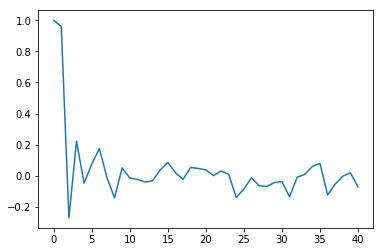

In [37]:
from statsmodels.tsa.stattools import pacf
import matplotlib.pyplot as plt
x_pacf = pacf(x, nlags=40, method='ols')
plt.plot(x_pacf)

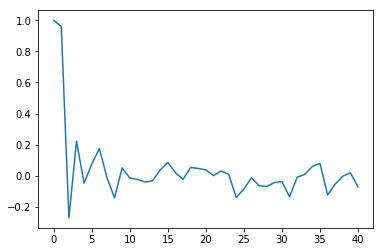

## Primero vamo a separar datos
 Crear los sets de entrenamiento  de prueba

## Vamo a definir una semilla

## Vamo a definir el modelo

## Vamo a entrenar el modelo

## Vamo a revisar qué tan bueno es el modelo

In [16]:
# importa el modelo secuencial, permite apilar capas de manera lineal
from keras.models import Sequential
# importa la capa densa, esta es una capa de red neuronal completamente conectada regular
# con una función lineal de activación
#from keras.layers.core import Dense, Activation
# importa todas las capas
from keras.layers import *
#from keras.layers.recurrent import LSTM
import numpy as np

C:\Users\Jergb\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
gru = GRU(50)(Input(shape = (10, 30)))

In [18]:
print(gru.shape)

(?, 50)


In [19]:
gru = GRU(50, return_sequences = False, return_state = True)(Input(shape = (10, 30)))
print(gru[0].shape)         # shape of output
print(gru[1].shape)         # shape of hidden state

(?, 50)
(?, 50)


In [20]:
gru = GRU(50, return_sequences = True, return_state = True)(Input(shape = (10, 30)))
print(gru[0].shape)         # shape of output
print(gru[1].shape)         # shape of hidden state

(?, ?, 50)
(?, 50)


In [21]:
output, hidden_state = GRU(50, return_sequences = True, return_state = True)(Input(shape = (10, 30)))
print(output.shape)
print(hidden_state.shape)

(?, ?, 50)
(?, 50)


In [22]:
# define una semilla para tener resultados repetibles
seed = 2016
np.random.seed(seed)
# Define el modelo secuencial
fit1 = Sequential()
# Agrega una capa LSTM con cuatro neuronas, activación tanh, activación interoir hard_sgimoitde
# y forma de entrada (5,1)
fit1.add(LSTM(output_dim=4, activation='tanh', inner_activation='hard_sigmoid',input_shape=(5, 1)))
#Agrega una capa densa con una slida y activación lineal
fit1.add(Dense(output_dim=1, activation='linear'))
#Compila el model con función de pérdidas MSE y optimizador rmsprop
# EL optimiador rmsprop actualiza el ritmo de aprendizaje del gradiente descendiente
fit1.compile(loss='mean_squared_error', optimizer='rmsprop')
#Ajustar el modelo
fit1.fit(x_train, y_train, batch_size = 1, nb_epoch=10, shuffle=False)

C:\Users\Jergb\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(activation="tanh", input_shape=(5, 1), units=4, recurrent_activation="hard_sigmoid")`
  
C:\Users\Jergb\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  # Remove the CWD from sys.path while we load stuff.


NameError: name 'x_train' is not defined